In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [32]:
data = pd.read_csv(r"C:\Users\Yashraj\Downloads\HepatitisCdata.csv")

In [33]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [34]:
data['Category'].replace({'0=Blood Donor':'0','3=Cirrhosis':3,'1=Hepatitis':'1','2=Fibrosis':'2','0s=suspect Blood Donor':'5'})
replace = {'m':0, 'f':1}
data.Sex = [replace[item] for item in data.Sex]

In [35]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [36]:
nan_values = data.isna()
nan_columns = nan_values.any()

columns_with_nan = data.columns[nan_columns].tolist()
print(columns_with_nan)

['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']


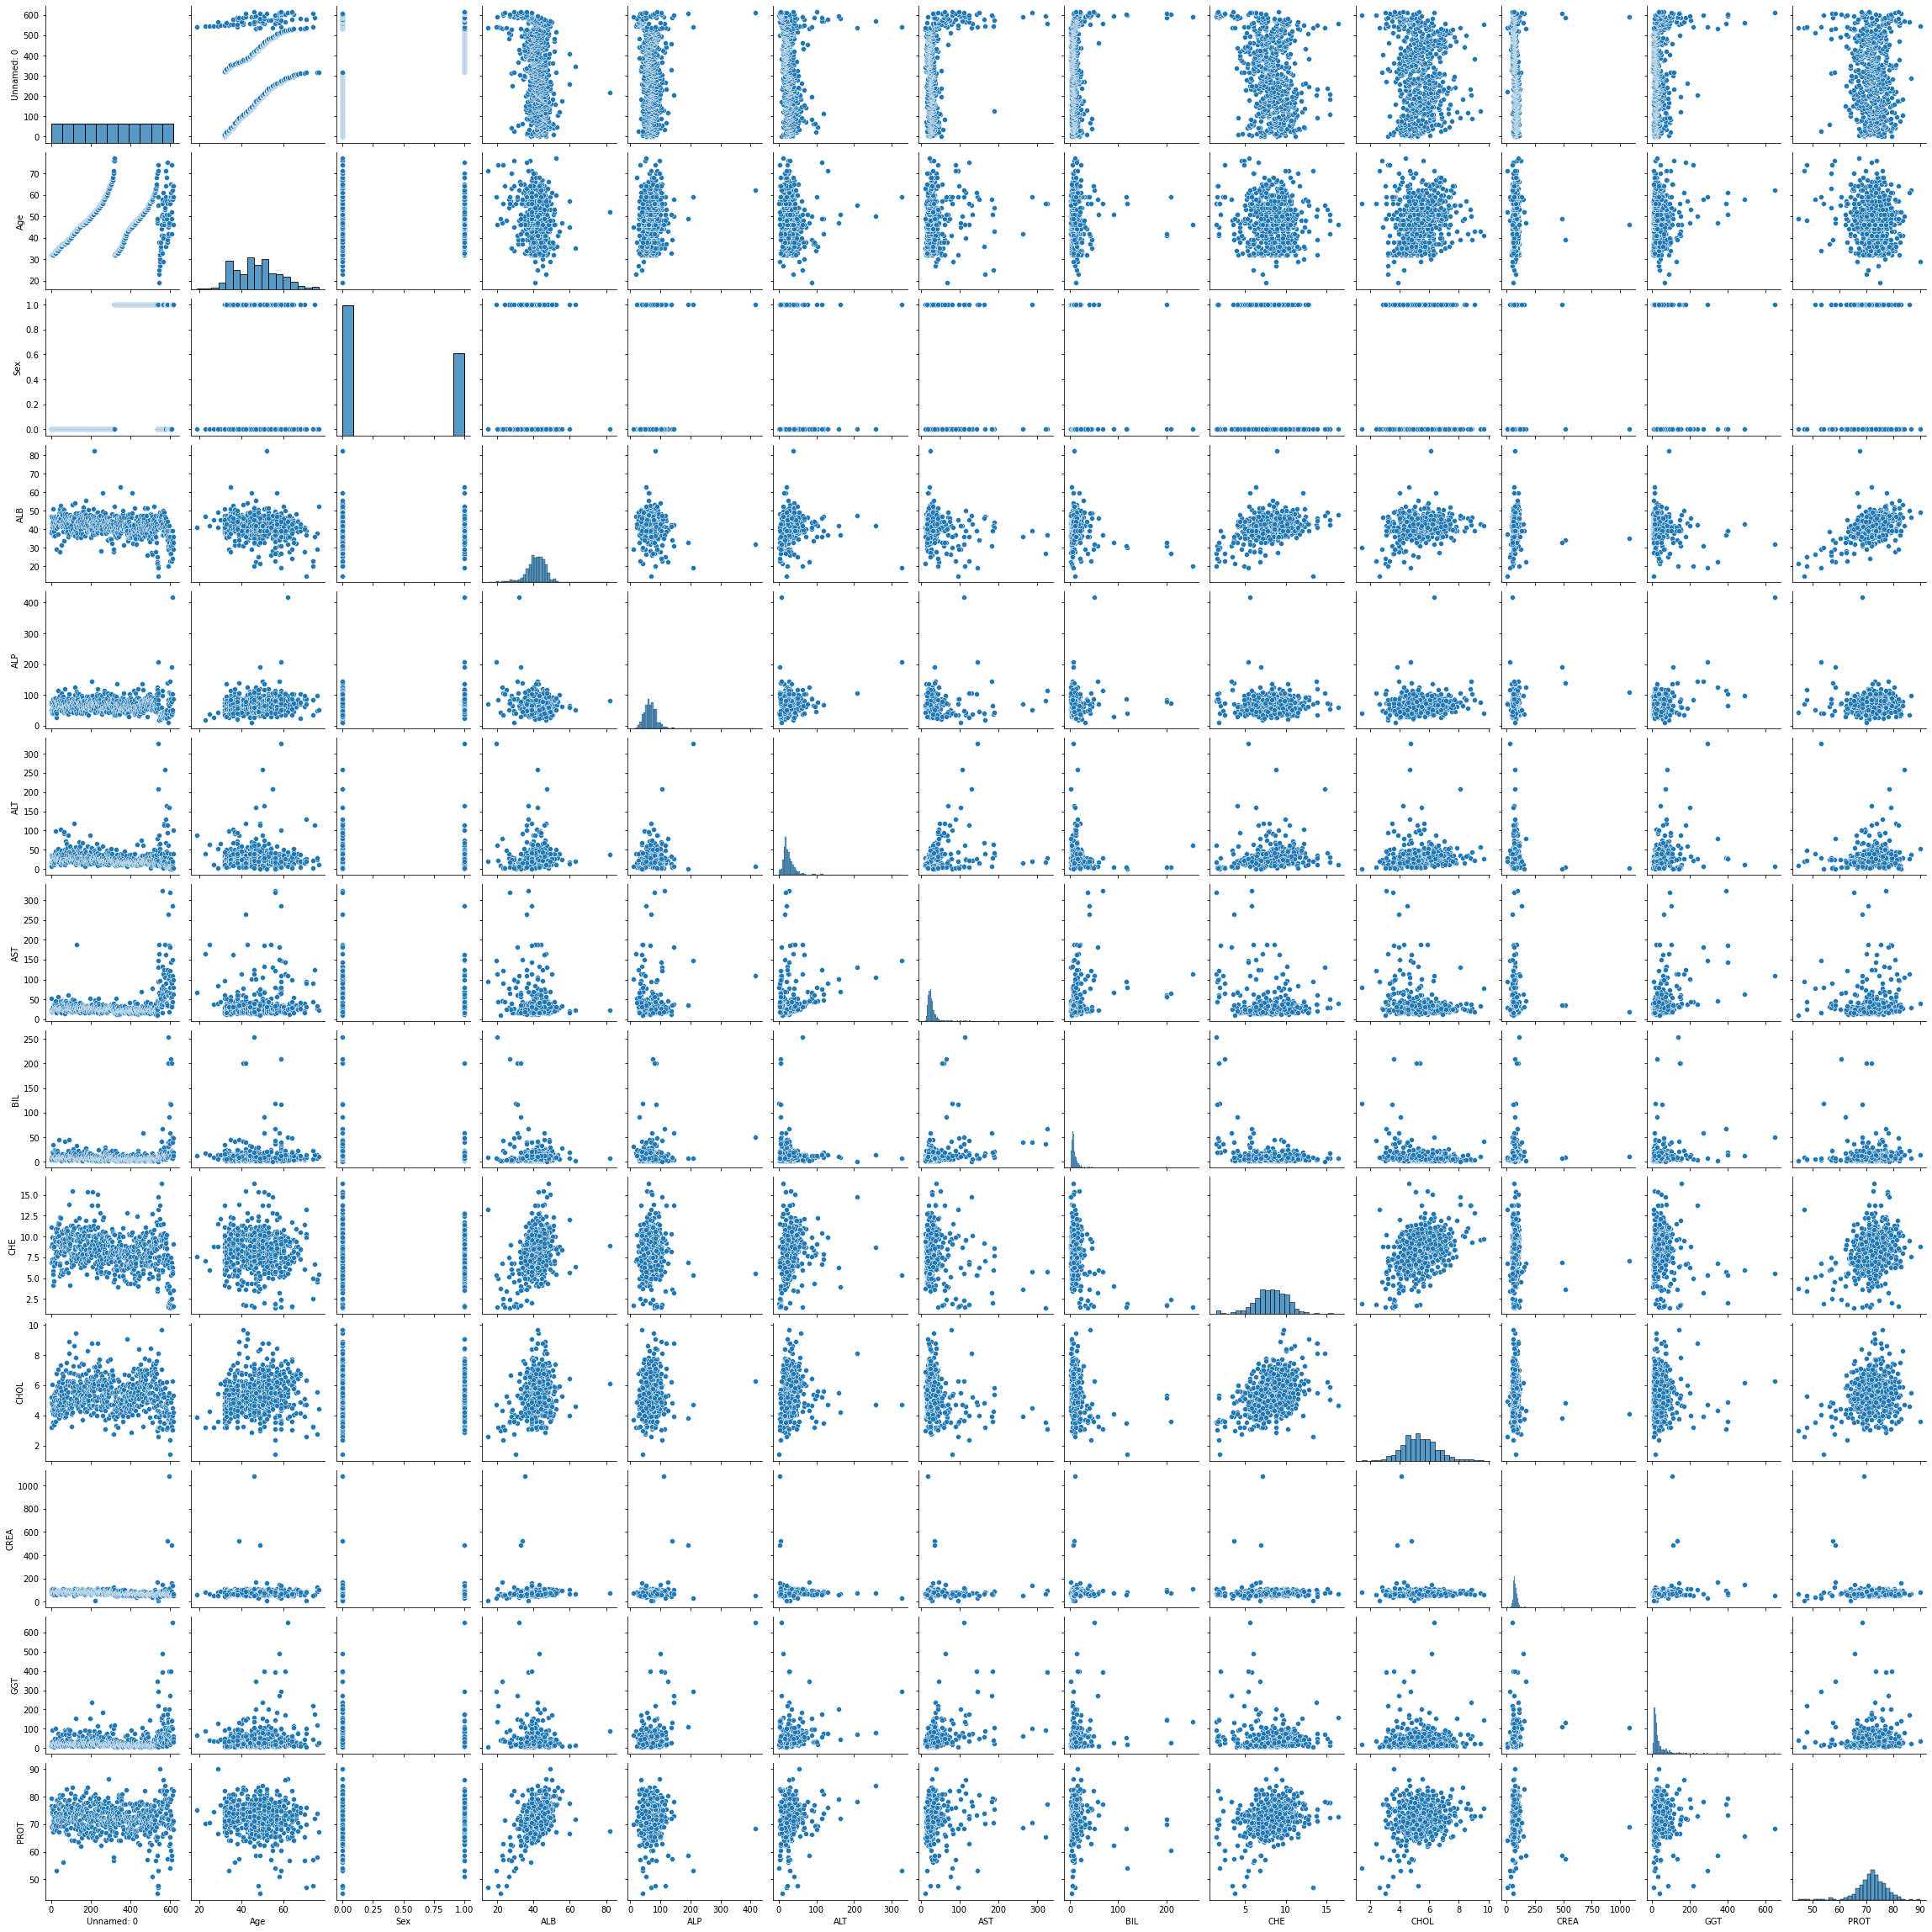

In [37]:
sns.pairplot(data)

In [38]:
data.interpolate(method ='linear', limit_direction ='backward', limit = 1, inplace=True)

In [39]:
X_data = data.drop(['Unnamed: 0','Category', 'ALP'], axis=1)

In [40]:
y = data['Category']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, random_state=101, test_size=0.2)

In [42]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=5)

In [43]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, pred)
print(f"The accuracy of the model is {accuracy}")

The accuracy of the model is 0.9024390243902439


<AxesSubplot:>

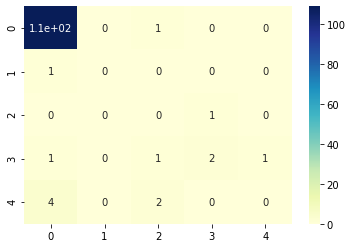

In [45]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')